### Import libraries

In [1]:
from sklearn.datasets import make_blobs #Generate data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


### Load Data

In [2]:
X,y = make_blobs(n_samples=500, n_features=2,centers=2, random_state=46)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=46)

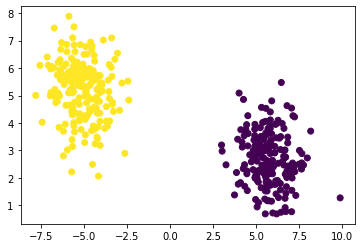

In [3]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [4]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [5]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [6]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

#training
nb.fit(X_train,y_train)

GaussianNB()

### Implementation on Titanic Dataset

In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.drop(columns=(['Name','Ticket','Embarked','Cabin']),axis=1,inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [10]:
df.set_index('PassengerId',inplace=True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [19]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=46)

In [13]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

num_values = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']
cat_values = ['Sex']

X_train_num = X_train[num_values]
X_train_cat = X_train[cat_values]
X_test_num = X_test[num_values]
X_test_cat = X_test[cat_values]

#imputasi
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_num)

X_train_num_prep = imputer.transform(X_train_num)
X_test_num_prep =  imputer.transform(X_test_num)

In [40]:
scaler = StandardScaler()
scaler.fit(X_train_num_prep)

X_train_num_prep = scaler.transform(X_train_num_prep)
X_test_num_prep =  scaler.transform(X_test_num_prep)

In [42]:
le = LabelEncoder()
le.fit(X_train_cat)

X_train_cat_prep = le.transform(X_train_cat)
X_test_cat_prep =  le.transform(X_test_cat)

/home/sonnyrd/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sonnyrd/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
import numpy as np
X_train_all = np.column_stack([X_train_num_prep,X_train_cat_prep])
X_test_all = np.column_stack([X_test_num_prep,X_test_cat_prep])

In [45]:
model = KNeighborsClassifier()
model.fit(X_train_all, y_train)

y_pred = model.predict(X_test_all)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       129
           1       0.82      0.76      0.78        94

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.82      0.83      0.82       223

